# Importing Libraries

Importing necessary libraries for image processing, data handling, and model building.

Entering the folder name: covid
Number of images in the folder is 10
Entering the folder name: normal
Number of images in the folder is 10
Entering the folder name: virus
Number of images in the folder is 10
Class labels mapping: {'covid': 0, 'normal': 1, 'virus': 2}


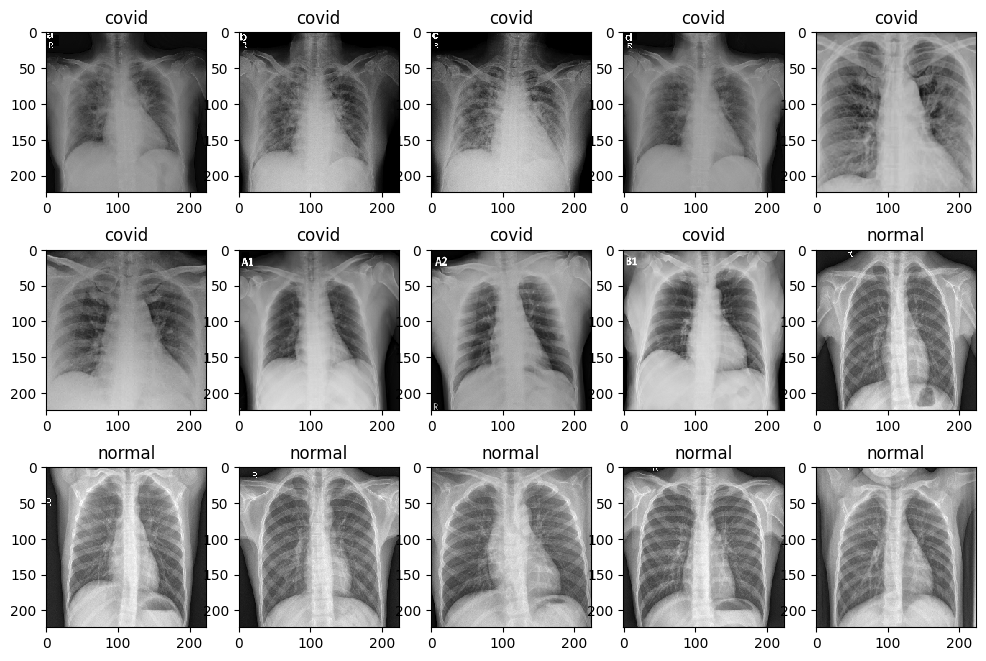

Entering the folder name: covid
Number of images in the folder is 10
Entering the folder name: normal
Number of images in the folder is 10
Entering the folder name: virus
Number of images in the folder is 10


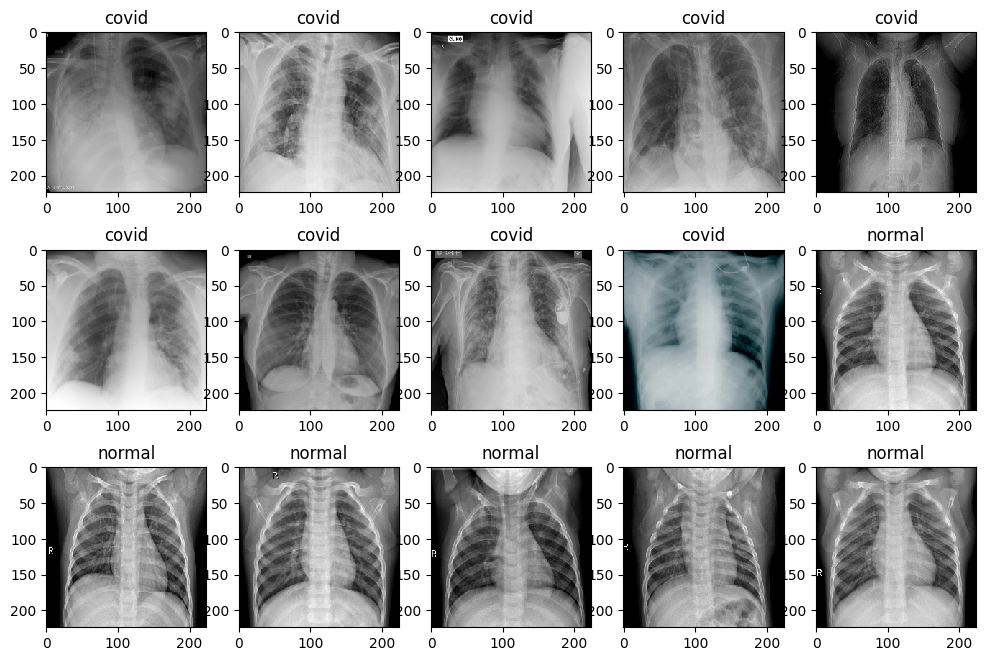

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow import keras
from keras.models import Model
import tensorflow as tf

trainpath = 'C:\\Users\\TSF\\Desktop\\Tapas\\covid\\datashort\\train'
testpath = 'C:\\Users\\TSF\\Desktop\\Tapas\\covid\\datashort\\test'

with tf.device('/GPU:0'):
  new_size = 224
  train_images = []
  train_labels = []
  class_cancer = {'covid': 0, 'normal': 1, 'virus': 2}
  # Create a dictionary to map folder names to unique numerical labels
  class_cancer = {}
  current_label = 0

  for i in os.listdir(trainpath):  # entering train folder
    if os.path.isdir(os.path.join(trainpath, i)):
        print("Entering the folder name:", i)

        # Use glob to find .jpg, .jpeg, and .png files
        files = gb.glob(os.path.join(trainpath, i, '*.jpg'))
        files += gb.glob(os.path.join(trainpath, i, '*.jpeg'))
        files += gb.glob(os.path.join(trainpath, i, '*.png'))


        # Limit the number of images processed per folder
        # max_images_per_folder = 1500  # Specify the maximum number of images per folder
        # files = files[:max_images_per_folder]  # Slice to limit the number of files
        print("Number of images in the folder is", len(files))

        for j in files:# reading each images
            class_cancer = {'covid': 0, 'normal': 1, 'virus': 2}
            image_raw=cv2.imread(j)
            image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
            resize_image=cv2.resize(image,(new_size,new_size))
            train_images.append(list(resize_image))
            train_labels.append(class_cancer[i])

  print("Class labels mapping:", class_cancer)


  w=40
  h=30
  fig=plt.figure(figsize=(12, 8))
  columns = 5
  rows = 3

  for i in range(1, columns*rows +1):
      ax = fig.add_subplot(rows, columns, i)
      if train_labels[i] == 0:
          ax.title.set_text('covid')
      elif train_labels[i]==1:
          ax.title.set_text('normal')
      else:
          ax.title.set_text('virus')
      plt.imshow(train_images[i], interpolation='nearest')
  plt.show()


  new_size = 224
  test_images = []
  test_labels = []

  # Create a dictionary to map folder names to unique numerical labels (same as training)
  class_cancer = {'covid': 0, 'normal': 1, 'virus': 2}

  for i in os.listdir(testpath):  # entering the test folder
      if os.path.isdir(os.path.join(testpath, i)):
          print("Entering the folder name:", i)

          # Use glob to find .jpg, .jpeg, and .png files
          files = gb.glob(os.path.join(testpath, i, '*.jpg'))
          files += gb.glob(os.path.join(testpath, i, '*.jpeg'))
          files += gb.glob(os.path.join(testpath, i, '*.png'))


          # Limit the number of images processed per folder
          # max_images_per_folder = 150  # Specify the maximum number of images per folder
          # files = files[:max_images_per_folder]  # Slice to limit the number of files
          print("Number of images in the folder is", len(files))

          # Assign a unique label to each class if it's not already assigned
          for j in files:
            class_cancer = {'covid': 0, 'normal': 1, 'virus': 2}
            image_raw=cv2.imread(j)
            image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
            resize_image=cv2.resize(image,(new_size,new_size))
            test_images.append(list(resize_image))
            test_labels.append(class_cancer[i])

  # print("Class labels mapping for test data:", test_labels)


  w=40
  h=30
  fig=plt.figure(figsize=(12, 8))
  columns = 5
  rows = 3

  for i in range(1, columns*rows +1):
      ax = fig.add_subplot(rows, columns, i)
      if train_labels[i] == 0:
          ax.title.set_text('covid')
      elif train_labels[i]==1:
          ax.title.set_text('normal')
      else:
          ax.title.set_text('virus')
      plt.imshow(test_images[i], interpolation='nearest')
  plt.show()

  def list_to_array_train(train_images,train_labels):
    return np.array(train_images),np.array(train_labels)

  X_train,y_train=list_to_array_train(train_images,train_labels)


  def list_to_array_test(test_images,test_labels):
    return np.array(test_images),np.array(test_labels)


  X_test,y_test=list_to_array_test(test_images,test_labels)

  def keras_to_categorical(y_train,y_test):
    return to_categorical(y_train),to_categorical(y_test)
  y_train1=y_train
  y_test1=y_test
  y_train,y_test=keras_to_categorical(y_train,y_test)


# VGG19


In [3]:

def model_vgg19():
  VGG19_model = VGG19(weights='vgg19_weights.h5', include_top=False, input_shape=(224,224, 3))
  # Make loaded layers as non-trainable
  for layer in VGG19_model.layers:
    layer.trainable = False # True for actual transfer learning
  feature = keras.layers.GlobalAveragePooling2D()(VGG19_model.output)
  d1 = Dense(units=256, kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2 = Dense(units=3, kernel_initializer="glorot_uniform", activation='softmax')(d1) # Adjust units to match number of classes
  output = Model(inputs=VGG19_model.input, outputs=d2)
  
  return output


results = []

for i in range(10):
    model19 = model_vgg19()

    model19.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model19.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=5, verbose=1, validation_data=(X_test, y_test))

    # Evaluate the model
    y_pred = model19.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='macro')
    recall = recall_score(y_true, y_pred_classes, average='macro')
    f1 = f1_score(y_true, y_pred_classes, average='macro')

    # Store results
    results.append({
        "Run": i + 1,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })


# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save to Excel
results_df.to_excel('vgg19_model_evaluation_results.xlsx', index=False)
print("Results saved to vgg19_model_evaluation_results.xlsx")


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4724 - loss: 4.1958 - val_accuracy: 0.4000 - val_loss: 3.1234
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6848 - loss: 1.5021 - val_accuracy: 0.4667 - val_loss: 4.1750
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 866ms/step - accuracy: 0.8505 - loss: 1.2233 - val_accuracy: 0.6333 - val_loss: 0.7802
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 540ms/step - accuracy: 1.0000 - loss: 0.0476 - val_accuracy: 0.6333 - val_loss: 1.5703
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 901ms/step - accuracy: 0.8505 - loss: 0.2918 - val_accuracy: 0.7000 - val_loss: 1.2589
Epoch 6/10
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 1.0000 - loss: 0.0059

KeyboardInterrupt: 

# VGG16

In [5]:

def model_vgg16():
  VGG_model = VGG16(weights='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(224, 224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=256,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=3,kernel_initializer="glorot_uniform", activation='softmax')(d1)
  output = Model(inputs =VGG_model.input, outputs =d2)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output




results = []

for i in range(10):
    model16 = model_vgg16()

    model16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model16.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=5, verbose=1, validation_data=(X_test, y_test))
    print(history)
    # Evaluate the model
    y_pred = model16.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='macro')
    recall = recall_score(y_true, y_pred_classes, average='macro')
    f1 = f1_score(y_true, y_pred_classes, average='macro')

    # Store results
    results.append({
        "Run": i + 1,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })


# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save to Excel
results_df.to_excel('vgg16_model_evaluation_results.xlsx', index=False)
print("Results saved to vgg16_model_evaluation_results.xlsx")


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 924ms/step - accuracy: 0.5243 - loss: 2.7972 - val_accuracy: 0.5000 - val_loss: 4.4173
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.7156 - loss: 1.2878

KeyboardInterrupt: 

# EfficientNetB3 Transfer Learning

In [8]:
from keras.applications import EfficientNetB0

def model_efficientnet():
    EfficientNet_model = EfficientNetB0(weights=None, include_top=False, input_shape=(224, 224, 3))
    EfficientNet_model.load_weights('efficientnetb0_notop.h5')  # Change the path accordingly
    # Make loaded layers non-trainable
    for layer in EfficientNet_model.layers:
        layer.trainable = False

    feature = keras.layers.GlobalAveragePooling2D()(EfficientNet_model.output)
    d1 = Dense(units=256, kernel_initializer="glorot_uniform", activation='relu')(feature)
    d2 = Dense(units=3, kernel_initializer="glorot_uniform", activation='softmax')(d1)

    output = Model(inputs=EfficientNet_model.input, outputs=d2)
    
    return output


results = []

for i in range(10):
    efficientnet_model = model_efficientnet()
    efficientnet_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the EfficientNet model
    history_efficientnet = efficientnet_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=5, verbose=1, validation_data=(X_test, y_test))

    # Evaluate the model
    y_pred = efficientnet_model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='macro')
    recall = recall_score(y_true, y_pred_classes, average='macro')
    f1 = f1_score(y_true, y_pred_classes, average='macro')

    # Store results
    results.append({
        "Run": i + 1,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })


# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save to Excel
results_df.to_excel('efficientnet_model_evaluation_results.xlsx', index=False)
print("Results saved to efficientnet_model_evaluation_results.xlsx")


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 763ms/step - accuracy: 0.3367 - loss: 1.1489 - val_accuracy: 0.6333 - val_loss: 0.7972
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.7833 - loss: 0.3817 - val_accuracy: 0.5333 - val_loss: 0.7837
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.9905 - loss: 0.1303 - val_accuracy: 0.5667 - val_loss: 1.1321
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 1.0000 - loss: 0.0884

KeyboardInterrupt: 

In [10]:
from keras.applications import ResNet50
def model_resnet50():
      ResNet50_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))
      ResNet50_model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')  # Change the path accordingly
  
      # Make loaded layers non-trainable
      for layer in ResNet50_model.layers:
          layer.trainable = False

      feature = keras.layers.GlobalAveragePooling2D()(ResNet50_model.output)
      d1 = Dense(units=256, kernel_initializer="glorot_uniform", activation='relu')(feature)
      d2 = Dense(units=3, kernel_initializer="glorot_uniform", activation='softmax')(d1)

      output = Model(inputs=ResNet50_model.input, outputs=d2)

      return output


results = []

for i in range(10):
    model_resnet = model_resnet50()
    model_resnet.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the EfficientNet model
    history_efficientnet = model_resnet.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=5, verbose=1, validation_data=(X_test, y_test))

    # Evaluate the model
    y_pred = model_resnet.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='macro')
    recall = recall_score(y_true, y_pred_classes, average='macro')
    f1 = f1_score(y_true, y_pred_classes, average='macro')

    # Store results
    results.append({
        "Run": i + 1,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })


# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save to Excel
results_df.to_excel('resnet50_model_evaluation_results.xlsx', index=False)
print("Results saved to resnet50_model_evaluation_results.xlsx")


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.3444 - loss: 4.7095

KeyboardInterrupt: 

# InceptionV3 Transfer Learning

In [14]:
from tensorflow.keras.applications import InceptionV3
def model_inceptionv3():
    Inception_model = InceptionV3(weights='inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(224, 224, 3))
    for layer in Inception_model.layers:
        layer.trainable = False
    feature = GlobalAveragePooling2D()(Inception_model.output)
    d1 = Dense(units=256, kernel_initializer="glorot_uniform", activation='relu')(feature)
    d2 = Dense(units=4, kernel_initializer="glorot_uniform", activation='softmax')(d1)
    output = Model(inputs=Inception_model.input, outputs=d2)
    return output


results = []

for i in range(10):
    model_imgnet = model_inceptionv3()
    model_imgnet.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model_imgnet.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

    # Evaluate the model
    y_pred = model_imgnet.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='macro')
    recall = recall_score(y_true, y_pred_classes, average='macro')
    f1 = f1_score(y_true, y_pred_classes, average='macro')

    # Store results
    results.append({
        "Run": i + 1,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })


# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save to Excel
results_df.to_excel('imagenet_model_evaluation_results.xlsx', index=False)
print("Results saved to imagenet_model_evaluation_results.xlsx")


NameError: name 'Adam' is not defined

In [ ]:
from tensorflow.keras.applications import InceptionV3
# # Ensure you're using GPU
# gpus = tf.config.list_physical_devices('GPU')
# print(f"Num GPUs Available: {len(gpus)}")

# if len(gpus) < 2:
#     print("Not enough GPUs available, ensure your environment is configured correctly")
# else:
#     for gpu in gpus:
#         tf.config.experimental.set_memory_growth(gpu, True)

    # Define the model using transfer learning with InceptionV3
def model_inceptionv3():
    Inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in Inception_model.layers:
        layer.trainable = False
    feature = GlobalAveragePooling2D()(Inception_model.output)
    d1 = Dense(units=256, kernel_initializer="glorot_uniform", activation='relu')(feature)
    d2 = Dense(units=4, kernel_initializer="glorot_uniform", activation='softmax')(d1)
    output = Model(inputs=Inception_model.input, outputs=d2)
    return output

# Strategy for multi-GPU
strategy = tf.distribute.MirroredStrategy()

# Function to train and evaluate the model
def train_and_evaluate_model_inceptionv3(X_train, y_train, X_test, y_test):
    with strategy.scope():
        model = model_inceptionv3()
        model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(y_test, axis=1)

        accuracy = accuracy_score(y_true, y_pred_classes)
        recall = recall_score(y_true, y_pred_classes, average='macro')
        precision = precision_score(y_true, y_pred_classes, average='macro')
        f1 = f1_score(y_true, y_pred_classes, average='macro')
        auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')

        return accuracy, recall, precision, f1, auc

# Perform multiple runs and store the results
num_runs = 10
results_inceptionv3 = {'accuracy': [], 'recall': [], 'precision': [], 'f1': [], 'auc': []}

for i in range(num_runs):
    accuracy, recall, precision, f1, auc = train_and_evaluate_model_inceptionv3(X_train, y_train, X_test, y_test)
    results_inceptionv3['accuracy'].append(accuracy)
    results_inceptionv3['recall'].append(recall)
    results_inceptionv3['precision'].append(precision)
    results_inceptionv3['f1'].append(f1)
    results_inceptionv3['auc'].append(auc)
    print(f"Run {i+1} - Accuracy: {accuracy:.8f}, Recall: {recall:.8f}, Precision: {precision:.8f}, F1 Score: {f1:.8f}, AUC: {auc:.8f}")

# Compute average and standard deviation for each metric
average_metrics_inceptionv3 = {metric: np.mean(values) for metric, values in results_inceptionv3.items()}
std_metrics_inceptionv3 = {metric: np.std(values) for metric, values in results_inceptionv3.items()}

print("\nAverage Metrics for InceptionV3:")
for metric, value in average_metrics_inceptionv3.items():
    print(f"{metric.capitalize()}: {value:.8f} (std: {std_metrics_inceptionv3[metric]:.8f})")


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.5100 - loss: 11.8948 - val_accuracy: 0.6725 - val_loss: 1.6704
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.6293 - loss: 2.0922 - val_accuracy: 0.6425 - val_loss: 1.5710
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.6980 - loss: 1.0717 - val_accuracy: 0.6400 - val_loss: 1.3626
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.7289 - loss: 0.8014 - val_accuracy: 0.7525 - val_loss: 0.6347
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.7721 - loss: 0.6043 - val_accuracy: 0.7825 - val_loss: 0.5750
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.7726 - loss: 0.5950 - val_accuracy: 0.6975 - val_loss: 0.7448
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.7815 - loss: 0.5580 - val_accuracy: 0.7925 - val_loss: 0.4924
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1